In [151]:
print("hello")

hello


In [152]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [153]:
dataset=pd.read_csv("Test.csv")

In [154]:
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [155]:
dataset.shape

(5681, 11)

In [156]:
dataset.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [157]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [158]:
dataset.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [159]:
dataset.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [160]:
dataset["Item_Weight"].mean()

12.695633368756642

In [161]:
dataset["Item_Weight"].fillna(dataset["Item_Weight"].mean(), inplace=True)

In [162]:
dataset.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [163]:
mode_of_outlet_size=dataset.pivot_table(values="Outlet_Size",columns="Outlet_Type",aggfunc=(lambda x:x.mode()[0]))#here we ae creating the pivot table and comparing of outlet size with the outlet type, since they are both so much of correleated, so we take the mode of them, mode means repeated values, total repeated values of there together. 

In [164]:
print(mode_of_outlet_size)#as you can see that grocery store is small, supermarket type1 is small etc..., now we are going to replace the null values in the outlet_size according to by comparing with the outlet type

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2 Supermarket Type3
Outlet_Size         Small             Small            Medium            Medium


In [165]:
missing_value=dataset["Outlet_Size"].isnull()

In [166]:
missing_value# here false means values are there and true means values are absent

0       False
1        True
2        True
3        True
4       False
        ...  
5676    False
5677    False
5678     True
5679     True
5680     True
Name: Outlet_Size, Length: 5681, dtype: bool

In [167]:
# now we are going to replace the missing_values with the mode

In [168]:
dataset.loc[missing_value,"Outlet_Size"]=dataset.loc[missing_value,"Outlet_Type"].apply(lambda x: mode_of_outlet_size[x])# so here we convert the missing values of the outlet_size based on the outlet_type

In [169]:
dataset.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [170]:
sns.set()

C:\Users\gaura\AppData\Local\Temp\ipykernel_14404\2933143642.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Item_Weight'])


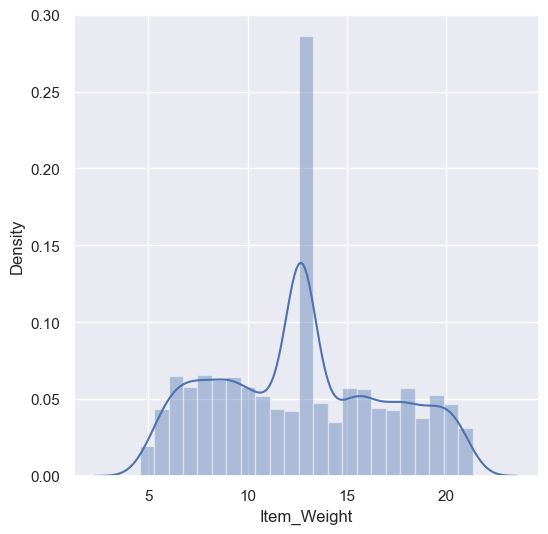

In [171]:
plt.figure(figsize=(6,6))
sns.distplot(dataset['Item_Weight'])
plt.show()

C:\Users\gaura\AppData\Local\Temp\ipykernel_14404\4027872832.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Item_Visibility'])


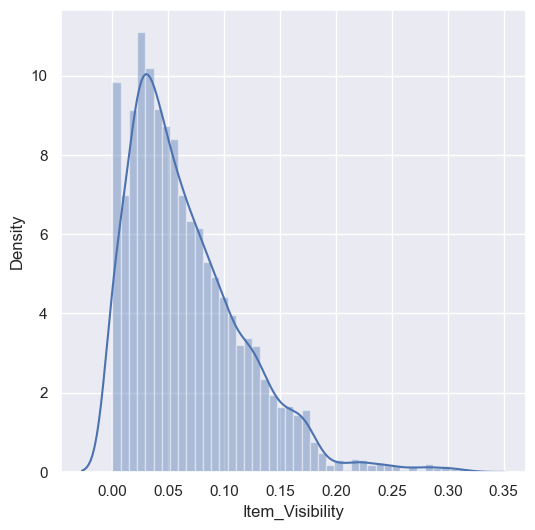

In [172]:
plt.figure(figsize=(6,6))
sns.distplot(dataset['Item_Visibility'])
plt.show()

C:\Users\gaura\AppData\Local\Temp\ipykernel_14404\3303301231.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Item_MRP'])


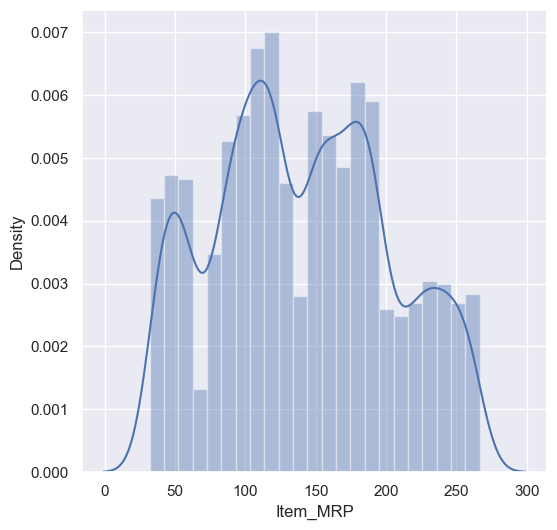

In [173]:
plt.figure(figsize=(6,6))
sns.distplot(dataset['Item_MRP'])
plt.show()

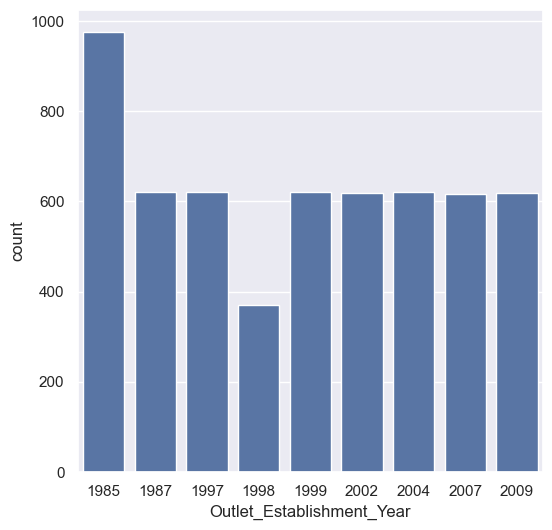

In [174]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=dataset)
plt.show()

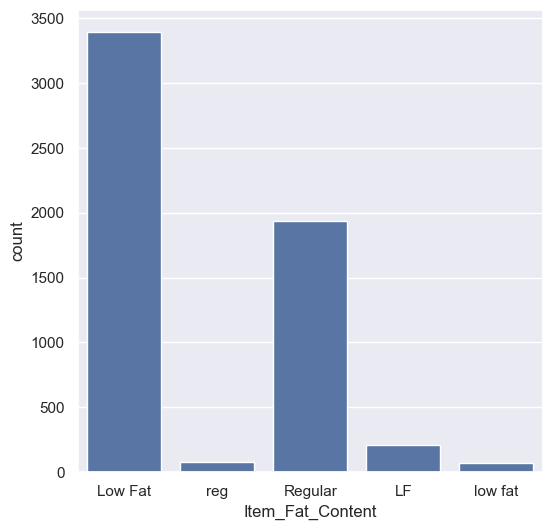

In [175]:
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=dataset)
plt.show()

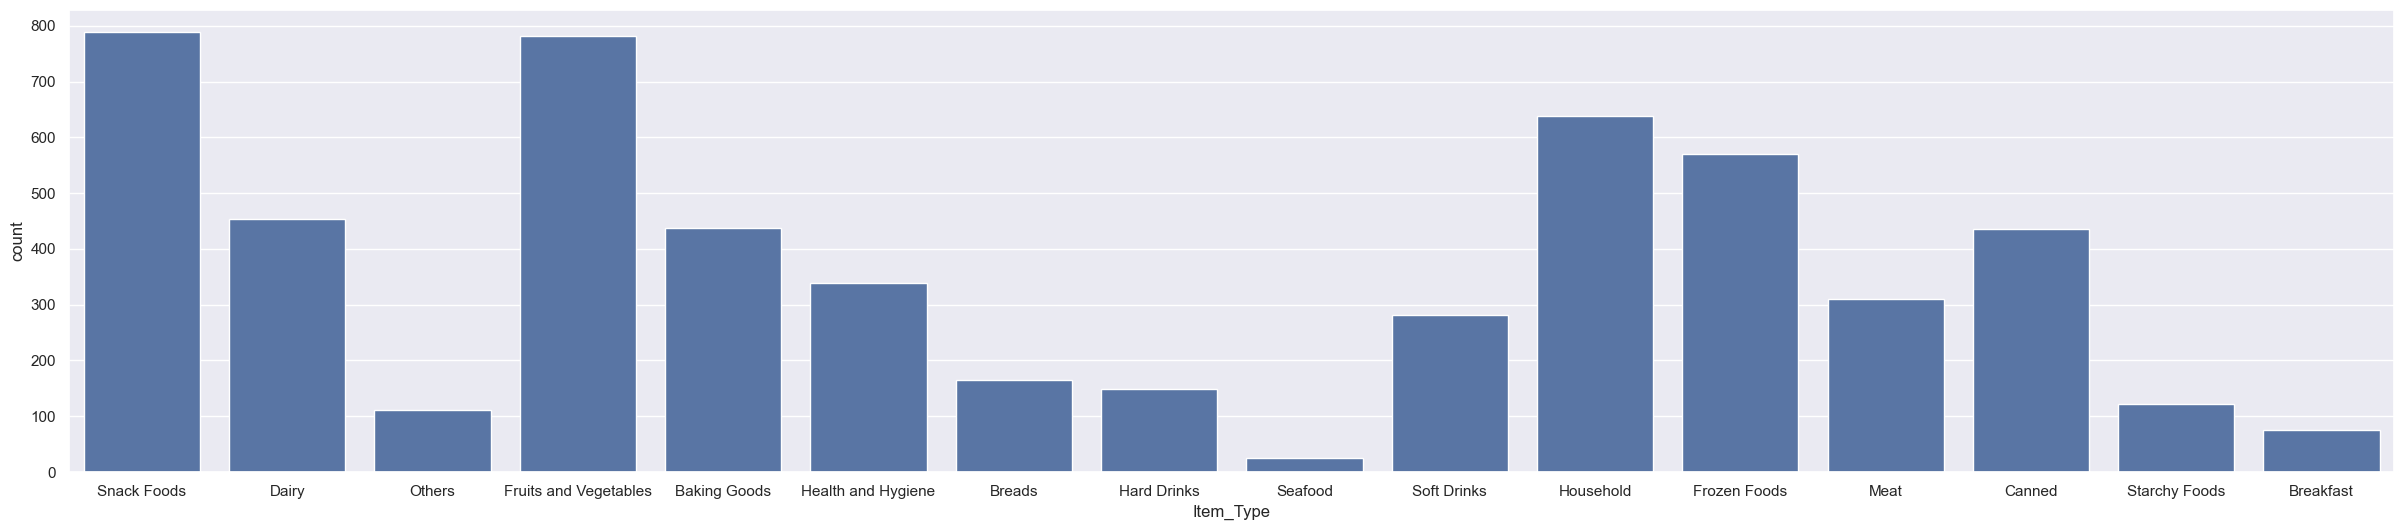

In [176]:
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data=dataset)
plt.show()

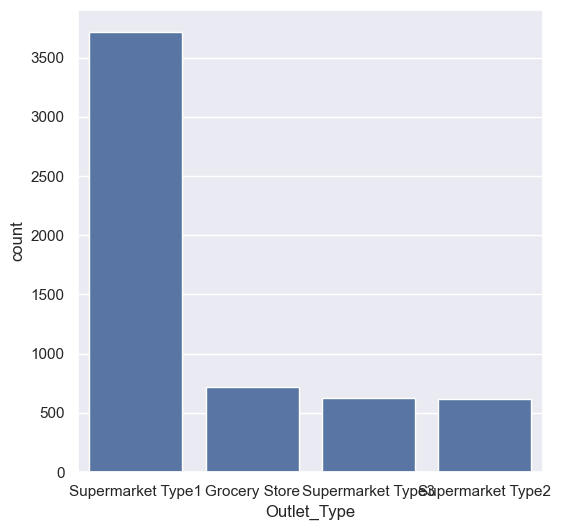

In [177]:
plt.figure(figsize=(6,6))  # Set the figure size
sns.countplot(x='Outlet_Type', data=dataset)  # Countplot using Seaborn
plt.show()  # Show the plot

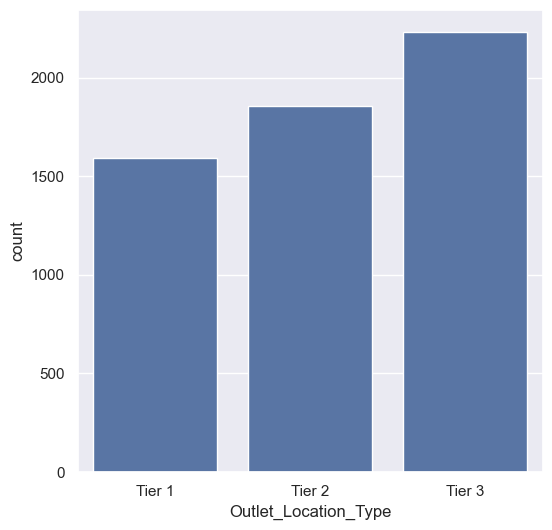

In [178]:
plt.figure(figsize=(6,6))  # Set the figure size
sns.countplot(x='Outlet_Location_Type', data=dataset)  # Countplot using Seaborn
plt.show()  # Show the plot

In [179]:
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Small,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [180]:
dataset["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: count, dtype: int64

In [181]:
dataset.replace({"Item_Fat_Content":{"LF": "Low Fat","low fat":"Low Fat","reg":"Regular"}}, inplace=True)

In [182]:
dataset["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat    3668
Regular    2013
Name: count, dtype: int64

In [183]:
encoder = LabelEncoder()

In [184]:
dataset['Item_Identifier'] = encoder.fit_transform(dataset['Item_Identifier'])


In [185]:

dataset['Item_Fat_Content'] = encoder.fit_transform(dataset['Item_Fat_Content'])



In [186]:
dataset['Item_Type'] = encoder.fit_transform(dataset['Item_Type'])


In [187]:

dataset['Outlet_Identifier'] = encoder.fit_transform(dataset['Outlet_Identifier'])



In [188]:
dataset['Outlet_Size'] = encoder.fit_transform(dataset['Outlet_Size'])


In [189]:

dataset['Outlet_Location_Type'] = encoder.fit_transform(dataset['Outlet_Location_Type'])



In [190]:

dataset['Outlet_Type'] = encoder.fit_transform(dataset['Outlet_Type'])

In [191]:
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,0,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300000,1,0.038428,4,87.3198,2,2007,2,1,1
2,1406,14.600000,0,0.099575,11,241.7538,0,1998,2,2,0
3,809,7.315000,0,0.015388,13,155.0340,2,2007,2,1,1
4,1184,12.695633,1,0.118599,4,234.2300,5,1985,1,2,3
